In [0]:
import pandas as pd
import numpy as np
import librosa 
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

**Importing an audio file. It includes the amplitude data of audio signal and also the sampling rate.**

In [0]:
y,sr=librosa.load("/content/drive/My Drive/ML_works/Recommendation_system/Audio_recommendation/Data_files/Jaane-Nahin-Denge.mp3")

In [0]:
ipd.Audio("/content/drive/My Drive/ML_works/Recommendation_system/Audio_recommendation/Data_files/Jaane-Nahin-Denge.mp3")

**SPLITTING THE AUDIO DATA.**

*This is used to split the audio file into certain equal parts.*

In [0]:
k=np.split(y, 7)

In [0]:
idx = slice(*librosa.time_to_frames([12,20], sr=sr))

In [0]:
idx

slice(516, 861, None)

In [0]:
x=librosa.time_to_frames(y,hop_length=512)

In [0]:
x

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
y

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

**EXTRACTING TEMPO AND BEAT_FRAMES FROM AUDIO DATA.**

*It is the speed of audio. It is defined as beats per minute of the signal. IT calculates the global tempo or tempo of the whole song.*

In [0]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

In [0]:
tempo

129.19921875

In [0]:
sr

22050

*It gives the index of frames in which a beat event is occuring.*

In [0]:
beat_frames

array([  16,   39,   59,   78,   98,  118,  138,  158,  177,  197,  217,
        237,  257,  277,  298,  319,  339,  359,  379,  400,  422,  442,
        463,  482,  502,  522,  542,  561,  581,  602,  623,  643,  663,
        683,  703,  723,  744,  764,  784,  804,  825,  845,  864,  885,
        905,  925,  945,  964,  984, 1005, 1028, 1047, 1067, 1087, 1107,
       1127, 1147, 1166, 1186, 1208, 1229, 1249, 1269, 1289, 1308, 1327,
       1349, 1370, 1390, 1410, 1430, 1451, 1469, 1486, 1503, 1522, 1541,
       1561, 1582, 1602, 1622, 1642, 1663, 1683, 1703, 1723, 1744, 1764,
       1784, 1805, 1825, 1845, 1863, 1884, 1904, 1925, 1945, 1965, 1985,
       2006, 2026, 2047, 2067, 2086, 2107, 2128, 2148, 2168, 2188, 2208,
       2228, 2248, 2269, 2289, 2309, 2329, 2349, 2369, 2389, 2410, 2430,
       2450, 2470, 2491, 2511, 2531, 2551, 2572, 2592, 2611, 2631, 2652,
       2671, 2691, 2711, 2731, 2751, 2771, 2793, 2813, 2833, 2853, 2873,
       2894, 2915, 2935, 2955, 2975, 2995, 3015, 30

**Extracting beat times.**

*It gives the location of beats in terms of time.*

In [0]:
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

In [0]:
beat_times

array([  0.37151927,   0.90557823,   1.36997732,   1.81115646,
         2.27555556,   2.73995465,   3.20435374,   3.66875283,
         4.10993197,   4.57433107,   5.03873016,   5.50312925,
         5.96752834,   6.43192744,   6.91954649,   7.40716553,
         7.87156463,   8.33596372,   8.80036281,   9.28798186,
         9.79882086,  10.26321995,  10.750839  ,  11.19201814,
        11.65641723,  12.12081633,  12.58521542,  13.02639456,
        13.49079365,  13.9784127 ,  14.46603175,  14.93043084,
        15.39482993,  15.85922902,  16.32362812,  16.78802721,
        17.27564626,  17.74004535,  18.20444444,  18.66884354,
        19.15646259,  19.62086168,  20.06204082,  20.54965986,
        21.01405896,  21.47845805,  21.94285714,  22.38403628,
        22.84843537,  23.33605442,  23.87011338,  24.31129252,
        24.77569161,  25.2400907 ,  25.7044898 ,  26.16888889,
        26.63328798,  27.07446712,  27.53886621,  28.04970522,
        28.53732426,  29.00172336,  29.46612245,  29.93

**Extracting clicks**  
A click is an external sound that appears in the audio signal.

In [0]:
clicks = librosa.clicks(beat_times, sr=sr, length=len(y))
ipd.Audio(y + clicks, rate=sr)

In [0]:
clicks.mean()

0.0003159557

**Extracting duration of audio.**

In [0]:
Duration=librosa.get_duration(y=y, sr=sr)

In [0]:
Duration

212.4

**Time stretching.**

In [0]:
#y, sr = librosa.load(librosa.util.example_audio_file())
y_fast = librosa.effects.time_stretch(y, 2.0)
y_slow=librosa.effects.time_stretch(y,0.5)

In [0]:
ipd.Audio(y_fast, rate=sr)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
ipd.Audio(y_slow, rate=sr)

**Triming of audio signal.**  
*On trimming it removes the samples with zero or very less frequency from the audio signal from both the ends.*

In [0]:
#y, sr = librosa.load(librosa.util.example_audio_file())
yt, index = librosa.effects.trim(y)

In [0]:
ipd.Audio(yt, rate=sr)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
yt

array([-1.7533870e-04, -1.3390342e-04,  4.9191480e-05, ...,
        5.7807408e-04,  4.6196926e-04,  2.7980056e-04], dtype=float32)

In [0]:
y

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [0]:
ipd.Audio(y, rate=sr)

Output hidden; open in https://colab.research.google.com to view.

**Tuning extraction**

*Tuning is realted to variation of frequency of an audio signal. It varries between -.0.5 to +0.5.*

In [0]:
#y, sr = librosa.load(librosa.util.example_audio_file())
Tuning=librosa.estimate_tuning(y=y, sr=sr, resolution=1e-3)

In [0]:
Tuning

-0.057999999999999996

**Extracting flatness**

*This tells that how noiseless is the audio signal. Higher the value of flatness lesser is the flatness. As the value reaches to 1 the signal tends towards white noise. It corresponds to each and every frame of the audio signal.*

In [0]:
flatness = librosa.feature.spectral_flatness(y=y)

In [0]:
flatness

array([[1.0000007, 1.0000007, 1.0000007, ..., 1.0000007, 1.0000007,
        1.0000007]], dtype=float32)

**Bandwidth extraction**

*This is the difference between max and min frequency of an audio signal. It corresponds to every frame of the signal.*

In [0]:
band_width = librosa.feature.spectral_bandwidth(y=y, sr=sr)

In [0]:
len(band_width[0])

9148

In [0]:
band_width[0][100:150]

array([1676.55505902, 1583.30075189, 1481.96466439, 1473.06342557,
       1505.23927801, 1587.86837678, 1537.0969098 , 1439.88060032,
       1429.15662624, 1464.56515923, 1515.62109708, 1477.69917466,
       1397.97550995, 1392.92453513, 1412.66596182, 1317.00318746,
       1267.47124968, 1346.13483011, 1403.99356195, 1385.31924133,
       1359.39249722, 1404.98356746, 1337.35863218, 1262.74577388,
       1231.0520283 , 1226.0717456 , 1349.30030097, 1303.76202982,
       1230.40038012, 1227.70820558, 1276.29777297, 1250.36716288,
       1252.27668732, 1213.89906987, 1154.88295962, 1205.27177284,
       1204.1258466 , 1211.88902119, 1283.65923938, 1186.42930004,
       1194.54591387, 1216.32990515, 1071.54682814, 1058.91318615,
       1128.18955005, 1100.05316516, 1200.13387526, 1552.16860567,
       2286.0160063 , 2764.83864171])

**Extracting tonnentz.**

*Tonnetz is the tonnal centroid features.Tonnal centroid frequency for each frame is calculated.*

In [0]:
har= librosa.effects.harmonic(y)
tonnetz = librosa.feature.tonnetz(y=har, sr=sr)

In [0]:
len(tonnetz)

6

**Spectral_centroid.**

*Mean frequency of each frame is called as spectral_centroid of the audio signal.*

In [0]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)

In [0]:
cent[0][8000]

2604.528787192891

**Pitches and magnitude**

*pitches contains the perceived frequency.*
*Magnitude is the amplitude at that instant.*

In [0]:
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

**Extracting harmonic and percussive from the orginal audio data.**

In [0]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

In [0]:
y_harmonic

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [0]:
y_percussive

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

**mfcc**

*This is mel frequency cepstral coefficients. This is a set of cepstral features extracted from stft of the original audio signal.*

In [0]:
mfcc = librosa.feature.mfcc(y=y, sr=sr,n_mfcc=13)

In [0]:
mfcc

array([[-491.41942836, -491.41942836, -491.41942836, ..., -491.41942836,
        -491.41942836, -491.41942836],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

**MFCC_delta**

In [0]:
mfcc_delta = librosa.feature.delta(mfcc)
#mfcc_delta is related to derivative of the mfcc function and also on the order of derivative of the function.

In [0]:
mfcc_delta

array([[9.64334042e-01, 9.64334042e-01, 9.64334042e-01, ...,
        4.38862840e-16, 4.38862840e-16, 4.38862840e-16],
       [1.28915548e+00, 1.28915548e+00, 1.28915548e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.16593322e+00, 1.16593322e+00, 1.16593322e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.20875029e-01, 9.20875029e-01, 9.20875029e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.62417360e-01, 7.62417360e-01, 7.62417360e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.09124705e-01, 6.09124705e-01, 6.09124705e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

**Chroma_cens**

*This is chroma energy normalized(cen) features of the audio signal.A chroma vector contains 12 features.They are named as {C, C♯, D, D♯, E ,F, F♯, G, G♯, A, A♯, B}*

In [0]:
c=librosa.feature.chroma_cens(y)

In [0]:
c

array([[0.16000043, 0.15603212, 0.15191186, ..., 0.        , 0.        ,
        0.        ],
       [0.1460526 , 0.146246  , 0.14626724, ..., 0.        , 0.        ,
        0.        ],
       [0.26894794, 0.26402344, 0.25925567, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07112622, 0.07456713, 0.07771123, ..., 0.        , 0.        ,
        0.        ],
       [0.05686219, 0.06010536, 0.06334934, ..., 0.        , 0.        ,
        0.        ],
       [0.02729626, 0.02956204, 0.03194292, ..., 0.        , 0.        ,
        0.        ]])

**Chroma_cqt**

*cqt is chroma q transformed of the audio signal.*

In [0]:
chromagram = librosa.feature.chroma_cqt(y=y_harmonic,sr=sr)

In [0]:
chromagram

array([[0.26248378, 0.2798796 , 0.27696522, ..., 0.        , 0.        ,
        0.        ],
       [0.09585021, 0.19531554, 0.31426973, ..., 0.        , 0.        ,
        0.        ],
       [0.85881558, 0.7527815 , 0.63386591, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.19834796, 0.25620484, 0.26943902, ..., 0.        , 0.        ,
        0.        ],
       [0.01679072, 0.18176933, 0.19922974, ..., 0.        , 0.        ,
        0.        ],
       [0.06950092, 0.1520096 , 0.1814461 , ..., 0.        , 0.        ,
        0.        ]])

In [0]:
beat_chroma = librosa.util.sync(chromagram,
                                beat_frames,
                                aggregate=np.median,)

In [0]:
len(beat_chroma[0]), len(beat_frames)

(426, 425)

**zero_crossing_rate**

*zero_crossing_rate is the count rate at which the value of signal is crossing the value zero i.e. it is changing its sign from positive to negative or negative to positive.*

In [0]:
zero_crossings = librosa.zero_crossings(y[0:10000], pad=False)

In [0]:
zero_crossings

array([False, False, False, ..., False, False, False])

**Spectral_rolloff**

*Spectral_rolloff frequency is the frequency at which corresponding energy will exceed a certain percentage of the total energy of the frame. Generally it is 0.85 of the total energy.*

In [0]:
spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]

In [0]:
spectral_rolloff

array([0., 0., 0., ..., 0., 0., 0.])

**Beat_mfcc_delta**

In [0]:
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]),
                                    beat_frames)

**beat_features**

In [0]:
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])

In [0]:
beat_features

array([[ 0.27842241,  0.02683114,  0.43289009, ...,  0.61257061,
         0.70549896,  0.29397194],
       [ 0.28153562,  0.03089326,  0.53848533, ...,  0.73317321,
         1.        ,  0.43789623],
       [ 0.508419  ,  0.03148625,  0.21682422, ...,  0.56713217,
         0.73773938,  0.42446458],
       ...,
       [-1.06983982,  0.10115439,  0.68245025, ..., -0.14516208,
         0.14688616,  0.0164142 ],
       [-0.83114054, -0.1611746 , -0.28327186, ..., -0.06044889,
         0.06279305, -0.01604865],
       [-0.61116554,  0.28942722, -0.76538881, ..., -0.01085173,
        -0.11832581, -0.00880741]])

**onset_strength**

Onset is a location at which sudden burst or fall occurs in an audio signal.

In [0]:
odf_strength = librosa.onset.onset_strength(y=y, sr=sr, hop_length=512)
#It is strength of all the onsets in a frame. 

In [0]:
odf_strength[100:190]

array([ 0.46710849,  0.2083366 ,  0.18640714,  0.27246357,  0.22435888,
        0.317894  ,  0.25704105,  0.07990665,  0.27860178,  0.21282066,
        0.17741361,  0.08509883,  0.14374926,  0.26596948,  0.22095226,
        0.29237624,  0.15978308,  0.24073859,  0.24686666,  0.11667969,
        0.12853719,  0.21990253,  0.15275805,  0.16881774,  0.33305046,
        0.18875628,  0.16289877,  0.25513182,  0.16789192,  0.1659441 ,
        0.27635676,  0.16807314,  0.06742113,  0.18508723,  0.39171626,
        0.24821497,  0.25472903,  0.24505144,  0.16607189,  0.13568428,
        0.11637694,  0.12168847,  0.16117086,  0.21358604,  0.39245044,
        0.23161343,  0.11773191,  0.17288586,  0.24374082,  0.20340751,
        0.21088364,  0.1914863 ,  6.36182506,  5.25321016,  1.44470758,
        0.47223269,  1.09855962,  7.87539258,  8.56916052,  2.14954878,
        1.05948142,  0.92759098,  0.98665011,  0.7186985 ,  0.89497021,
        0.46222154,  0.4203219 ,  2.54164046,  8.89785114,  2.44

In [0]:
len(odf_strength), len(y)

(9148, 4683420)

In [0]:
4683420/512

9147.3046875

**onset_default**

In [0]:
onset_detect = librosa.onset.onset_detect(y=y, sr=sr, hop_length=512,units='time',)
#Gives estimated position(time) of peaks of onsets occured in the audio signal.

In [0]:
len(onset_detect)

596

**Amplitude plotting.**

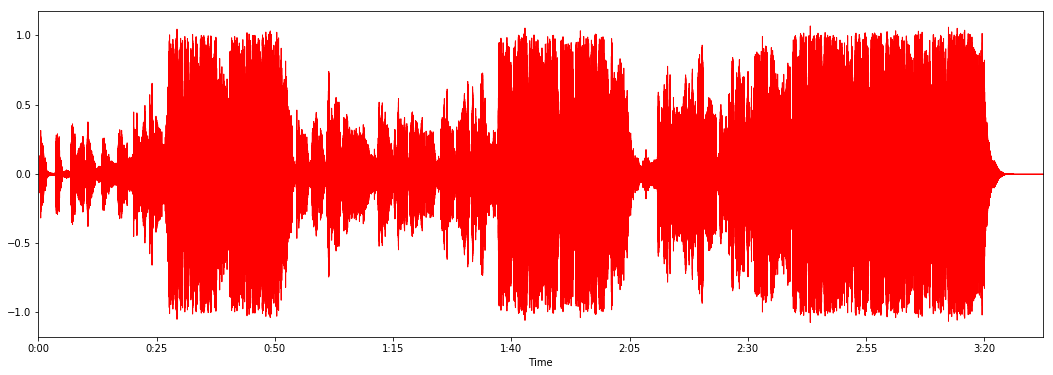

In [0]:
plt.figure(figsize=(18, 6))
librosa.display.waveplot(y, sr=sr, color="red")
plt.show()

**Monophonic waveform extraction and plotting.**

In [0]:
#y, sr = librosa.load(librosa.util.example_audio_file(), duration=10)#Default extraction is monophonic.

Text(0.5, 1.0, 'Monophonic')

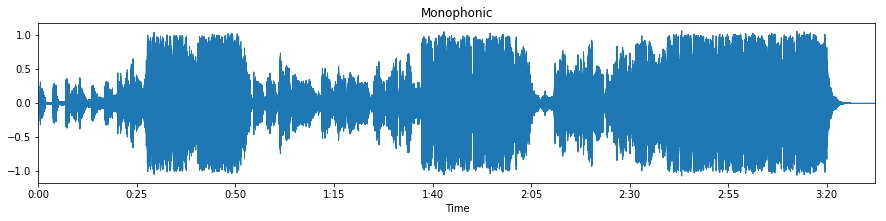

In [0]:
plt.figure(figsize=(15,10))
plt.subplot(3, 1, 1)
librosa.display.waveplot(y, sr=sr)
plt.title('Monophonic')

**Stereo waveform extraction and plotting.**

In [0]:
y_stereo, sr = librosa.load("/content/drive/My Drive/ML_works/Recommendation_system/Audio_recommendation/Data_files/Jaane-Nahin-Denge.mp3",mono=False)#here it is needed to mention mono=false

Text(0.5, 1.0, 'Stereo')

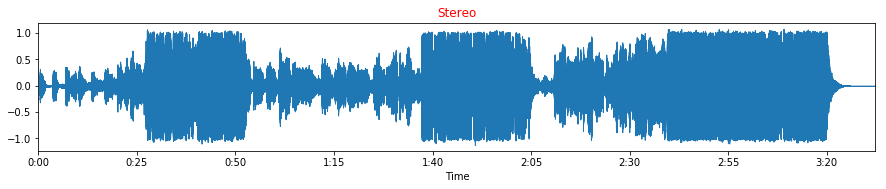

In [0]:
plt.figure(figsize=(15,8))
plt.subplot(3, 1, 2)
librosa.display.waveplot(y_stereo, sr=sr)
plt.title('Stereo', color="red")

**Harmonic and Percussive waveform, extraction and plotting.**

In [0]:
#y, sr = librosa.load(librosa.util.example_audio_file(), duration=10)
y_harm, y_perc = librosa.effects.hpss(y)

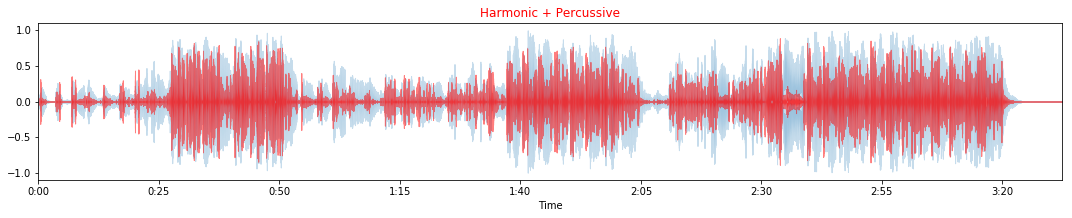

In [0]:
plt.figure(figsize=(15,8))
plt.subplot(3, 1, 3)
librosa.display.waveplot(y_harm, sr=sr, alpha=0.25)
librosa.display.waveplot(y_perc, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive', color="red")
plt.tight_layout()
plt.show()

**Spectrogram extraction(Frequency_time_plot)**

Spectrogram is a plot showing distribution of frequency with time for an audio signal.stft is short term Fourier transform.

In [0]:
X = librosa.stft(y)# X is the forier transfrom of y, the original amplitude array.
Xdb = librosa.amplitude_to_db(abs(X))# Xdb is the converted format of amplitude into decible.

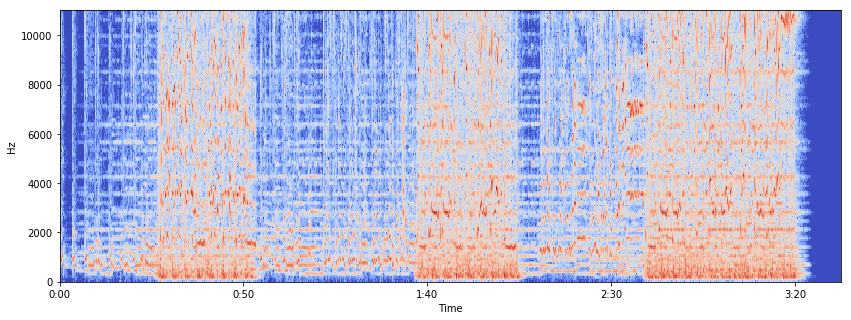

In [0]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb[:200], sr=sr, x_axis='time', y_axis='hz')
plt.show()

**Python_speech_features.**

In [0]:
pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5889 sha256=ccd13e9222ee22fb818e282e02070164e617bfe4f50345807afb14fc03e9b949
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [0]:
from python_speech_features import mfcc
from python_speech_features import fbank

In [0]:
mfcc_features=mfcc(y, sr)

In [0]:
mfcc_features

array([[-3.60436534e+01,  0.00000000e+00, -3.20763172e-14, ...,
        -3.27769755e-13,  0.00000000e+00,  3.59484803e-13],
       [-3.60436534e+01,  0.00000000e+00, -3.20763172e-14, ...,
        -3.27769755e-13,  0.00000000e+00,  3.59484803e-13],
       [-3.60436534e+01,  0.00000000e+00, -3.20763172e-14, ...,
        -3.27769755e-13,  0.00000000e+00,  3.59484803e-13],
       ...,
       [-3.60436534e+01,  0.00000000e+00, -3.20763172e-14, ...,
        -3.27769755e-13,  0.00000000e+00,  3.59484803e-13],
       [-3.60436534e+01,  0.00000000e+00, -3.20763172e-14, ...,
        -3.27769755e-13,  0.00000000e+00,  3.59484803e-13],
       [-3.60436534e+01,  0.00000000e+00, -3.20763172e-14, ...,
        -3.27769755e-13,  0.00000000e+00,  3.59484803e-13]])

In [0]:
len(mfcc_features)

21191

In [0]:
f_bank=fbank(y, sr, nfft=512)

In [0]:
len(f_bank)

2

In [0]:
len(f_bank[1])

21191

In [0]:
f_bank_energy=f_bank[1]

In [0]:
f_bank_features=f_bank[0]

In [0]:
len(f_bank_features), len(f_bank_energy)

(21191, 21191)

In [0]:
f_bank_features[0]

array([2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16])

In [0]:
f_bank_energy

array([2.22044605e-16, 2.22044605e-16, 2.22044605e-16, ...,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16])